In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity

In [24]:
df = pd.read_csv('df_cleaned.csv')

In [25]:
df.shape

(144166, 21)

In [26]:
df.tail()

,Unnamed: 0,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,...,song_name,song_popularity,speechiness,tempo,valence,year,duration_min,genres,artist_popularity,song_decade
144161,144161,0.0292,Lil Xxel,0.748,0.457,0,0.000294,6,0.4440,-7.560,...,LMK,71,0.0465,123.035,0.464,2020,3.14,"[""'pop r&b'""]",71,2020s
144162,144162,0.2820,SPiCYSOL,0.608,0.368,0,0.000002,5,0.0908,-8.539,...,10years vintage - LiVE from 2020.3.5 @EBISU LI...,12,0.0278,125.941,0.212,2020,5.22,"[""'city pop'"", ""'japanese r&b'""]",12,2020s
144163,144163,0.8250,Lincoln,0.695,0.232,0,0.000000,1,0.5900,-11.010,...,Saint Bernard,68,0.0972,100.488,0.451,2020,1.72,"[""'indie pop'"", ""'modern indie pop'""]",68,2020s
144164,144164,0.0205,RAYE,0.749,0.820,0,0.000685,7,0.0775,-6.114,...,Regardless,76,0.0478,120.066,0.534,2020,3.29,"[""'dance pop'"", ""'pop'"", ""'pop dance'"", ""'post...",80,2020s
144165,144165,0.1250,Sfera Ebbasta,0.755,0.882,1,0.001420,10,0.1030,-1.957,...,Baby,1,0.0532,99.984,0.606,2021,3.23,"[""'italian hip hop'"", ""'italian pop'"", ""'trap ...",1,2020s


In [27]:
df.drop(columns ='Unnamed: 0', inplace=True)

In [28]:
df.tail()

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,song_name,song_popularity,speechiness,tempo,valence,year,duration_min,genres,artist_popularity,song_decade
144161,0.0292,Lil Xxel,0.748,0.457,0,0.000294,6,0.4440,-7.560,1,LMK,71,0.0465,123.035,0.464,2020,3.14,"[""'pop r&b'""]",71,2020s
144162,0.2820,SPiCYSOL,0.608,0.368,0,0.000002,5,0.0908,-8.539,0,10years vintage - LiVE from 2020.3.5 @EBISU LI...,12,0.0278,125.941,0.212,2020,5.22,"[""'city pop'"", ""'japanese r&b'""]",12,2020s
144163,0.8250,Lincoln,0.695,0.232,0,0.000000,1,0.5900,-11.010,1,Saint Bernard,68,0.0972,100.488,0.451,2020,1.72,"[""'indie pop'"", ""'modern indie pop'""]",68,2020s
144164,0.0205,RAYE,0.749,0.820,0,0.000685,7,0.0775,-6.114,1,Regardless,76,0.0478,120.066,0.534,2020,3.29,"[""'dance pop'"", ""'pop'"", ""'pop dance'"", ""'post...",80,2020s
144165,0.1250,Sfera Ebbasta,0.755,0.882,1,0.001420,10,0.1030,-1.957,0,Baby,1,0.0532,99.984,0.606,2021,3.23,"[""'italian hip hop'"", ""'italian pop'"", ""'trap ...",1,2020s


### EDA

In [29]:
df.describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,song_popularity,speechiness,tempo,valence,year,duration_min,artist_popularity
count,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000,144166.000000
mean,0.493255,0.528681,0.492909,0.058370,0.183556,5.193825,0.209495,-11.502790,0.710181,29.692147,0.078120,117.436688,0.525736,1978.053071,3.919463,29.232628
std,0.377425,0.176051,0.271451,0.234443,0.324340,3.501892,0.182336,5.580913,0.453680,21.107551,0.109901,30.258919,0.267660,24.552015,2.150613,18.386307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,0.080000,0.000000
25%,0.087400,0.407000,0.264000,0.000000,0.000001,2.000000,0.097900,-14.505000,0.000000,11.000000,0.034500,94.342500,0.306000,1959.000000,2.830000,14.000000
50%,0.504000,0.538000,0.482000,0.000000,0.000457,5.000000,0.135000,-10.654000,1.000000,30.000000,0.043800,115.793000,0.536000,1978.000000,3.500000,31.000000
75%,0.884000,0.657000,0.719000,0.000000,0.178000,8.000000,0.266000,-7.362000,1.000000,45.000000,0.068300,135.622000,0.751000,1997.000000,4.480000,42.000000
max,0.996000,0.988000,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.970000,243.507000,1.000000,2021.000000,59.630000,91.000000


In [30]:
df['artists'].value_counts()

Francisco Canaro           2228
Frédéric Chopin             952
Wolfgang Amadeus Mozart     910
Johann Sebastian Bach       885
Ludwig van Beethoven        855
                           ... 
Tiny Meat Gang                1
Khaled                        1
Kinto Sol                     1
Jodie Sands                   1
Slim Dusty                    1
Name: artists, Length: 15321, dtype: int64

In [31]:
# The Longest Song
df[df["duration_min"]==59.63]

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,song_name,song_popularity,speechiness,tempo,valence,year,duration_min,genres,artist_popularity,song_decade
15200,0.888,Umm Kulthum,0.368,0.391,0,0.000156,8,0.695,-9.693,1,Fakarouny,37,0.0519,96.624,0.331,1960,59.63,"[""'arab folk'"", ""'belly dance'"", ""'classic ara...",4,1960s


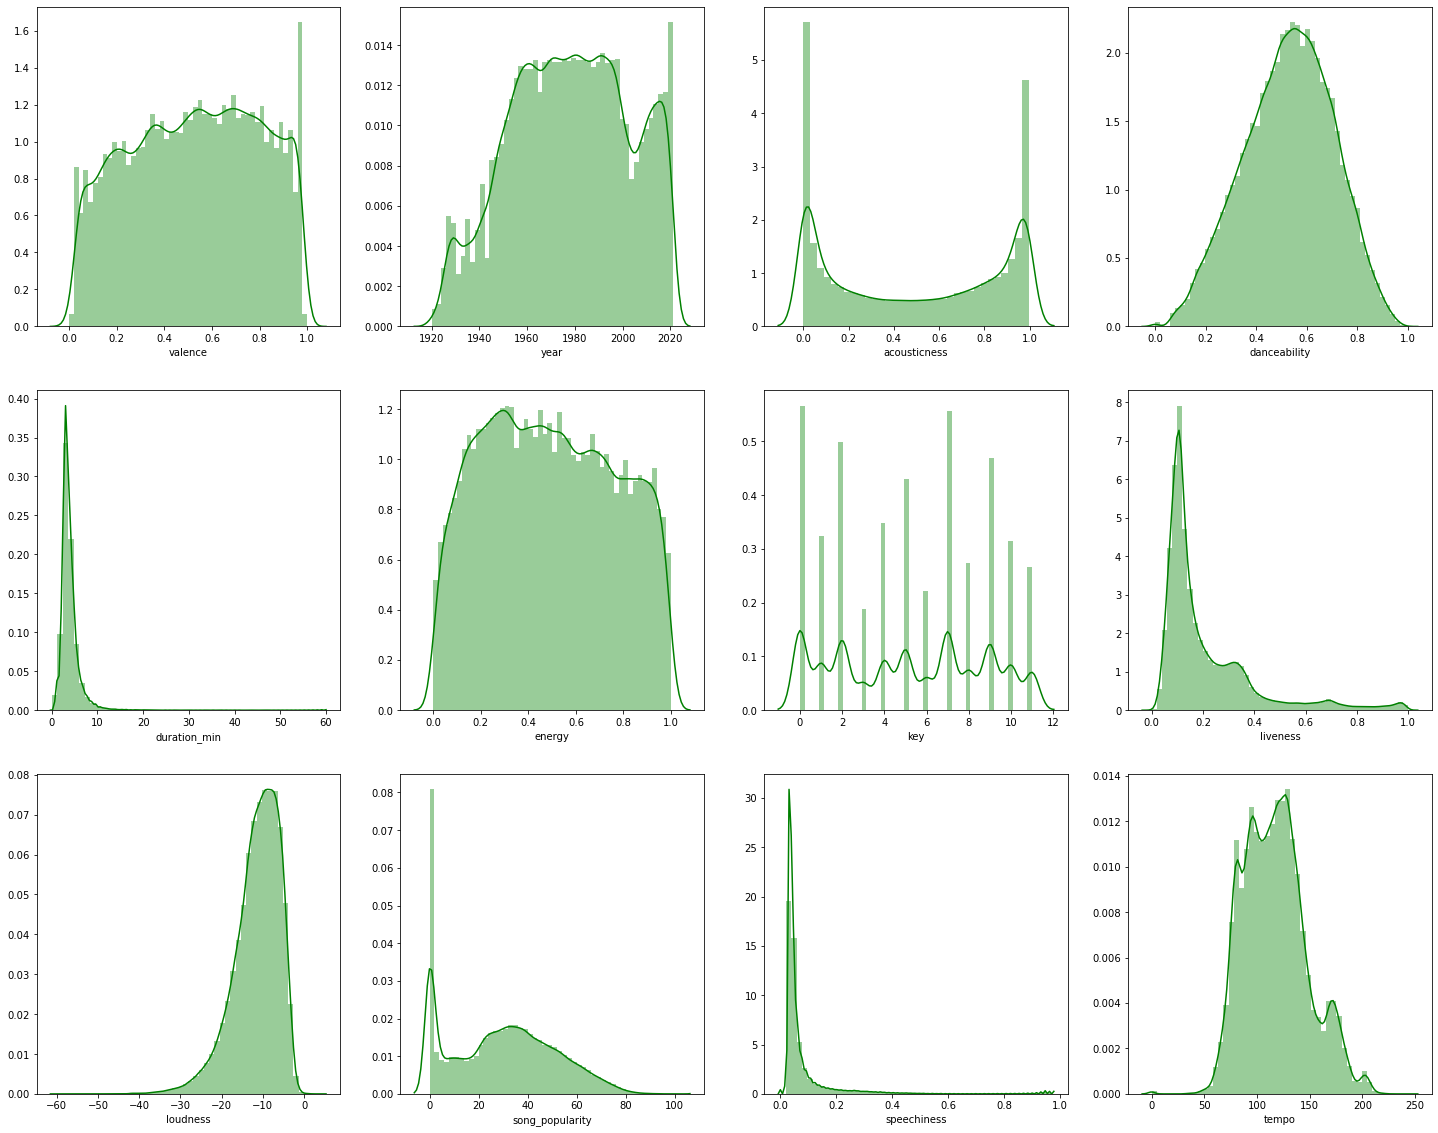

In [32]:
# Distributions of features
fig,ax = plt.subplots(3,4,figsize=(25,20))

sns.distplot(df['valence'],ax=ax[0,0], color='g')
sns.distplot(df['year'],ax=ax[0,1],color='g')
sns.distplot(df['acousticness'],ax=ax[0,2],color='g')
sns.distplot(df['danceability'],ax=ax[0,3],color='g')
sns.distplot(df['duration_min'],ax=ax[1,0],color='g')
sns.distplot(df['energy'],ax=ax[1,1],color='g')
sns.distplot(df['key'],ax=ax[1,2],color='g')
sns.distplot(df['liveness'],ax=ax[1,3],color='g')
sns.distplot(df['loudness'],ax=ax[2,0],color='g')
sns.distplot(df['song_popularity'],ax=ax[2,1],color='g')
sns.distplot(df['speechiness'],ax=ax[2,2],color='g')
sns.distplot(df['tempo'],ax=ax[2,3],color='g');


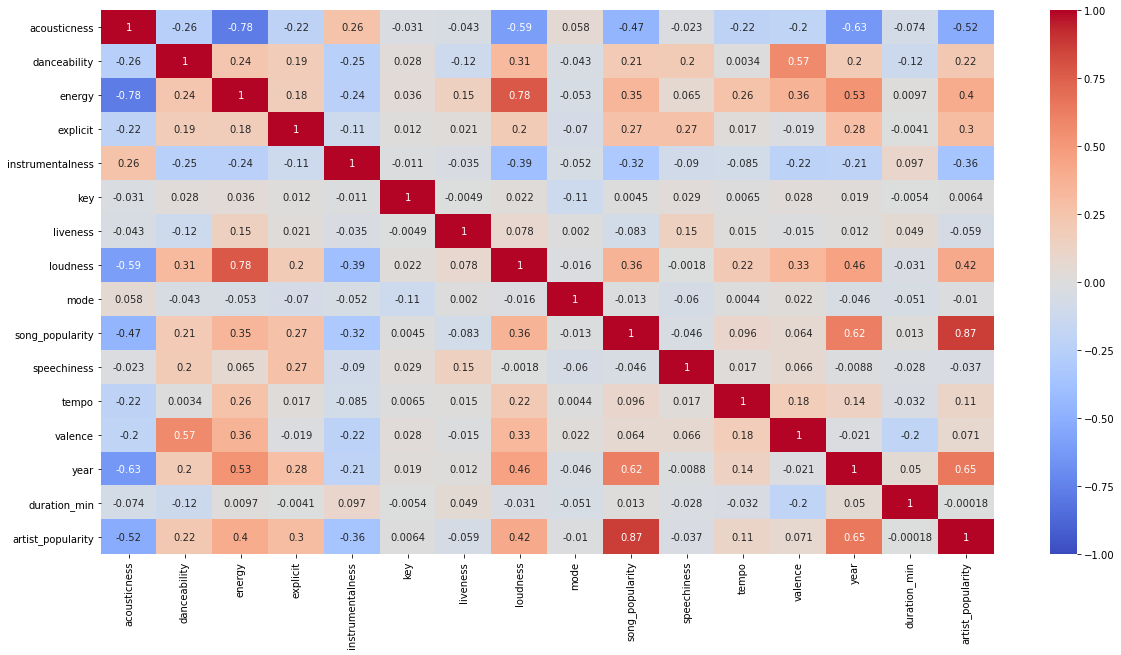

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),
           annot=True,
           vmin=-1,
           vmax=1,
           cmap='coolwarm');

### Most Popular Songs

In [34]:
popular = df.groupby("song_name")["song_popularity"].mean().sort_values(ascending=False).head(25)
popular

song_name
drivers license                            100.0
positions                                   96.0
Mood (feat. iann dior)                      96.0
Therefore I Am                              94.0
34+35                                       94.0
WITHOUT YOU                                 94.0
LA NOCHE DE ANOCHE                          94.0
What You Know Bout Love                     93.0
DÁKITI                                      93.0
you broke me first                          93.0
Anyone                                      92.0
WAP (feat. Megan Thee Stallion)             92.0
Lonely (with benny blanco)                  92.0
HOLIDAY                                     92.0
The Business                                92.0
Head & Heart (feat. MNEK)                   91.0
La Nota                                     91.0
ROCKSTAR (feat. Roddy Ricch)                91.0
For The Night (feat. Lil Baby & DaBaby)     91.0
Relación - Remix                            90.0
Vida de Ri

In [35]:
df[df['song_name']=='drivers license']

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,song_name,song_popularity,speechiness,tempo,valence,year,duration_min,genres,artist_popularity,song_decade
108697,0.721,Olivia Rodrigo,0.585,0.436,1,0.000013,10,0.105,-8.761,1,drivers license,100,0.0601,143.874,0.132,2021,4.03,"[""'pop'"", ""'post-teen pop'""]",82,2020s


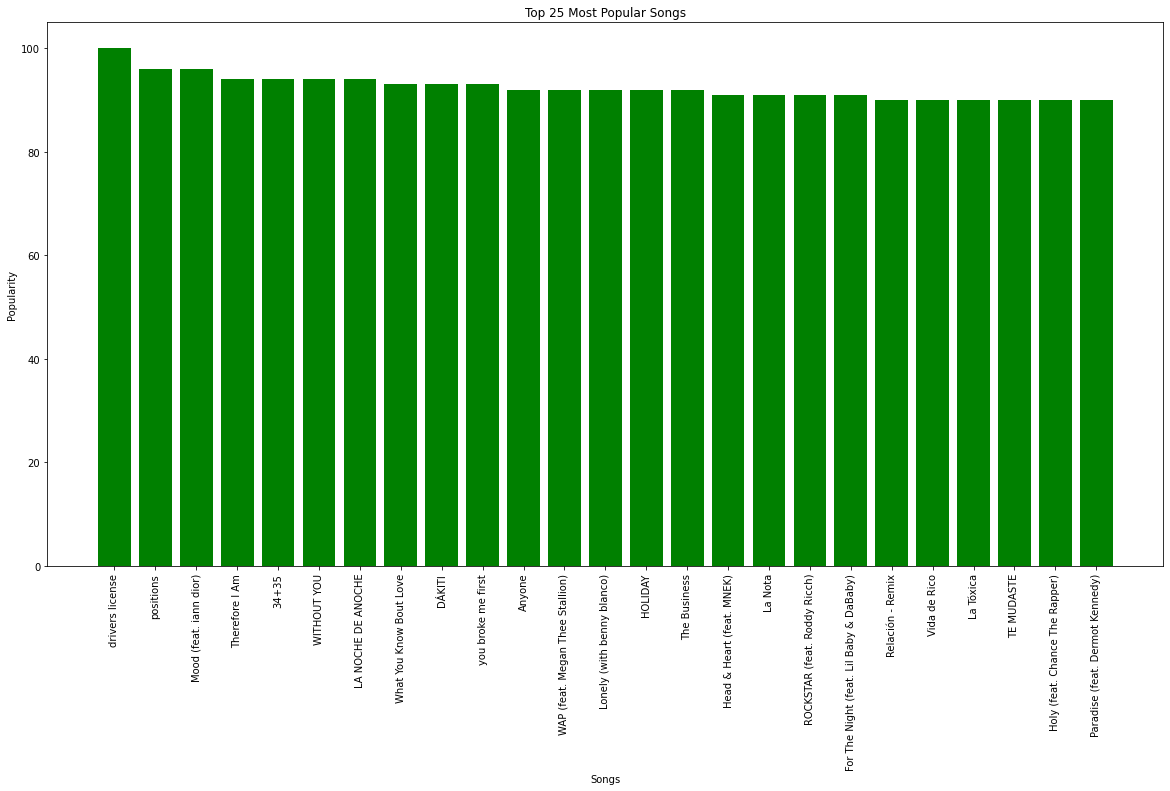

In [36]:
plt.figure(figsize=(20,10))
plt.bar(x=popular.index, height=popular,data = popular,color='g')
plt.title('Top 25 Most Popular Songs')
plt.xlabel('Songs')
plt.ylabel('Popularity')
plt.xticks(rotation=90);

In [37]:
pd.options.display.max_rows = 102
# Most popular songs by year
pop_year = df.sort_values('song_popularity', ascending=False).groupby('year').first()
pop_year = pop_year.reset_index()
pop_year = pop_year[['year', 'artists', 'song_name', 'song_popularity','artist_popularity']]

pop_year

,year,artists,song_name,song_popularity,artist_popularity
0,1920,Oscar Velazquez,True House Music - Xavier Santos & Carlos Gomi...,17,11
1,1921,Sergei Rachmaninoff,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,3
2,1922,Uli,Carve,6,1
3,1923,Bessie Smith,Nobody Knows You When You're Down and Out,41,18
4,1924,Paul Whiteman & His Orchestra,Mississippi Mud (feat. Bix Beiderbecke),15,4
5,1925,Tommy Dorsey,"On the Sunny Side of the Street (From ""Is Ever...",36,8
6,1926,Fats Waller,Ain't Misbehavin',47,11
7,1927,Bix Beiderbecke,Singin' The Blues,39,7
8,1928,Benny Goodman,"Sing, Sing, Sing",50,11
9,1929,Louis Armstrong,Mack the Knife,51,20


In [38]:
pd.options.display.max_rows = 102
# Most popular songs by decade
pop_decade = df.sort_values('song_popularity', ascending=False).groupby('song_decade').first()
pop_decade = pop_decade.reset_index()
pop_decade = pop_decade[['song_decade','year', 'artists', 'song_name', 'song_popularity','artist_popularity']]

pop_decade

,song_decade,year,artists,song_name,song_popularity,artist_popularity
0,1920s,1929,Louis Armstrong,Mack the Knife,51,20
1,1930s,1933,Billie Holiday,All of Me (with Eddie Heywood & His Orchestra),63,16
2,1940s,1942,Bing Crosby,White Christmas,80,27
3,1950s,1957,Bobby Helms,Jingle Bell Rock,85,41
4,1960s,1964,Brenda Lee,Rockin' Around The Christmas Tree,87,30
5,1970s,1977,Fleetwood Mac,Dreams - 2004 Remaster,86,35
6,1980s,1983,The Police,Every Breath You Take,84,47
7,1990s,1994,Mariah Carey,All I Want for Christmas Is You,90,45
8,2000s,2008,Mother Mother,Hayloft,85,61
9,2010s,2019,Harry Styles,Watermelon Sugar,91,77


### Most Popular Artists

In [39]:
popular_artists = df.groupby("artists")["artist_popularity"].sum().sort_values(ascending=False).head(25)
popular_artists

artists
Frank Sinatra               20468
The Beatles                 19090
Elvis Presley               17238
The Rolling Stones          15855
Fleetwood Mac               15750
Bob Dylan                   14070
Taylor Swift                13664
Johnny Cash                 13208
Led Zeppelin                12714
Queen                       12576
Ella Fitzgerald             12489
The Beach Boys              11596
Bob Marley & The Wailers    11508
Johann Sebastian Bach       11505
Billie Holiday              10688
David Bowie                 10642
Pink Floyd                  10480
Eminem                      10208
Miles Davis                  9880
Drake                        9639
Vicente Fernández            9614
Dean Martin                  9394
Elton John                   9213
Metallica                    8385
U2                           8360
Name: artist_popularity, dtype: int64

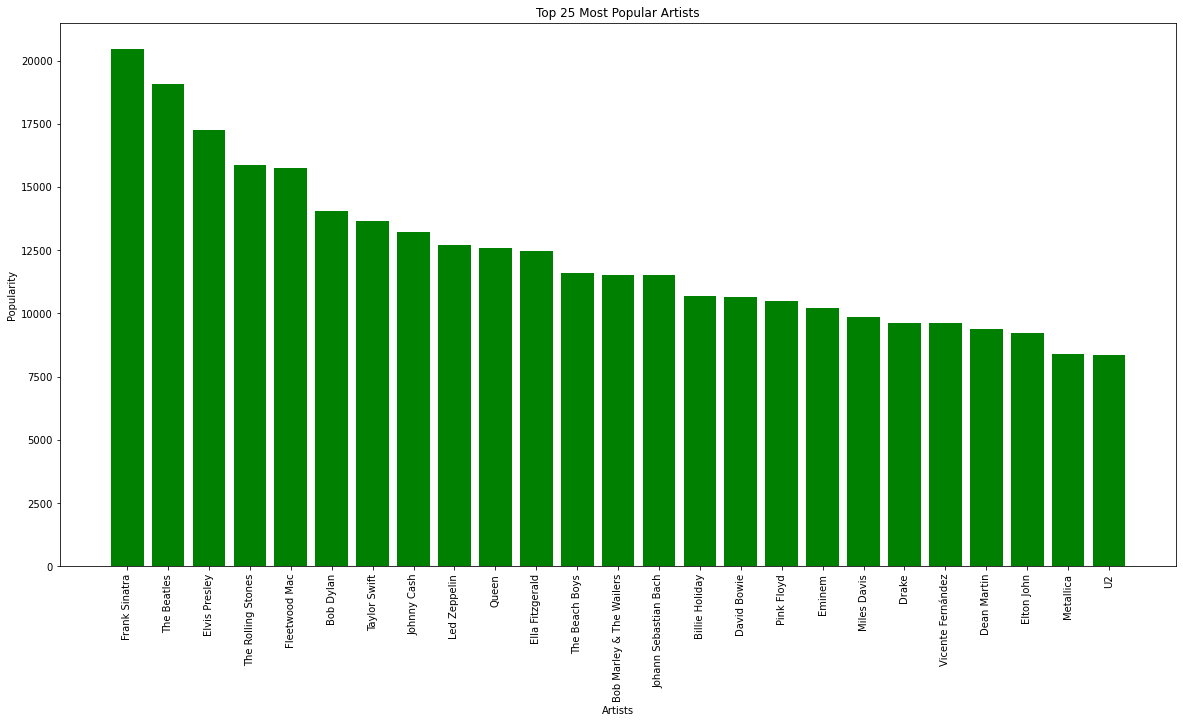

In [40]:
plt.figure(figsize=(20,10))
plt.bar(x=popular_artists.index, height=popular_artists,data = popular_artists,color='g')
plt.title('Top 25 Most Popular Artists')
plt.xlabel('Artists')
plt.ylabel('Popularity')
plt.xticks(rotation=90);

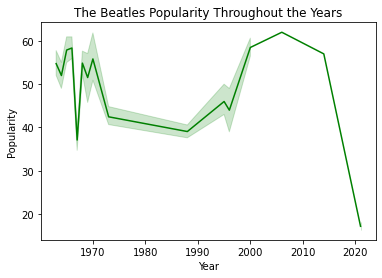

In [41]:
beatles = df[df["artists"]=="The Beatles"]
sns.lineplot(x=beatles["year"], y=beatles["song_popularity"],data=beatles, color="g")
plt.title("The Beatles Popularity Throughout the Years")
plt.xlabel("Year")
plt.ylabel("Popularity");

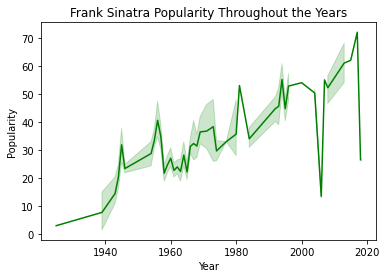

In [42]:
sinatra = df[df["artists"]=="Frank Sinatra"]
sns.lineplot(x=sinatra["year"], y=sinatra["song_popularity"],data=sinatra, color='g')
plt.title("Frank Sinatra Popularity Throughout the Years")
plt.xlabel("Year")
plt.ylabel("Popularity");

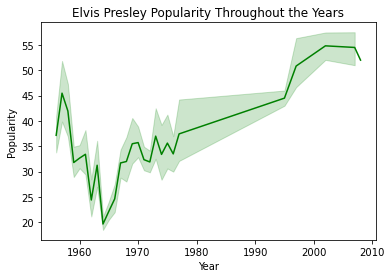

In [43]:
elvis = df[df["artists"]=="Elvis Presley"]
sns.lineplot(x=elvis["year"], y=elvis["song_popularity"],data=elvis,color="g")
plt.title("Elvis Presley Popularity Throughout the Years")
plt.xlabel("Year")
plt.ylabel("Popularity");

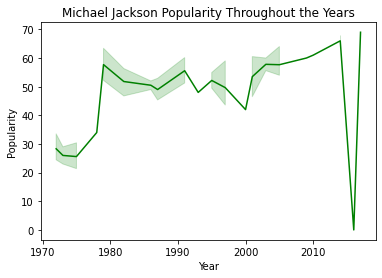

In [44]:
mj = df[df["artists"]=="Michael Jackson"]
sns.lineplot(x=mj["year"], y=mj["song_popularity"],data=mj,color="g")
plt.title("Michael Jackson Popularity Throughout the Years")
plt.xlabel("Year")
plt.ylabel("Popularity");

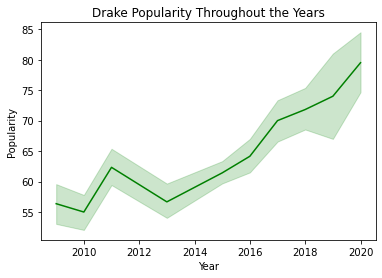

In [45]:
drake = df[df["artists"]=="Drake"]
sns.lineplot(x=drake["year"], y=drake["song_popularity"],data=drake,color="g")
plt.title("Drake Popularity Throughout the Years")
plt.xlabel("Year")
plt.ylabel("Popularity");

In [46]:
pd.options.display.max_rows = 31856
# Most popular artists by year
pop_artists_year = df.groupby(['artists','year'])['song_popularity'].sum()
pop_artists_year = pop_artists_year.reset_index()
pop_artists_year['year_song_count'] = df.groupby(["artists","year"])['artists'].value_counts().values
pop_artists_year = pop_artists_year.sort_values(["year","song_popularity"], ascending = False)
pop_artists_year = pop_artists_year.groupby('year').first()

pop_artists_year

,artists,song_popularity,year_song_count
year,,,
1920,Oscar Velazquez,33,3
1921,Sergei Rachmaninoff,23,22
1922,Uli,6,6
1923,Bessie Smith,425,22
1924,Jean Goldkette and his Orchestra,53,9
1925,Tommy Dorsey,309,37
1926,Fats Waller,694,62
1927,Bix Beiderbecke,168,16
1928,Frédéric Chopin,442,150


In [47]:
pd.options.display.max_rows = 102
# Most popular artists by decade
pop_artists_decade = df.groupby(['artists','song_decade'])['song_popularity'].sum()
pop_artists_decade = pop_artists_decade.reset_index()
pop_artists_decade['decade_song_count'] = df.groupby(['artists','song_decade'])['artists'].value_counts().values
pop_artists_decade = pop_artists_decade.sort_values(['song_decade',"song_popularity"], ascending = False)
pop_artists_decade = pop_artists_decade.groupby('song_decade').first()
pop_artists_decade

,artists,song_popularity,decade_song_count
song_decade,,,
1920s,Fats Waller,694,62
1930s,Billie Holiday,4955,454
1940s,Doris Day,2366,129
1950s,Ella Fitzgerald,7780,359
1960s,The Beatles,12916,275
1970s,Fleetwood Mac,8428,239
1980s,U2,5998,158
1990s,2Pac,5868,122
2000s,Eminem,4713,81


### Audio Features Over Time

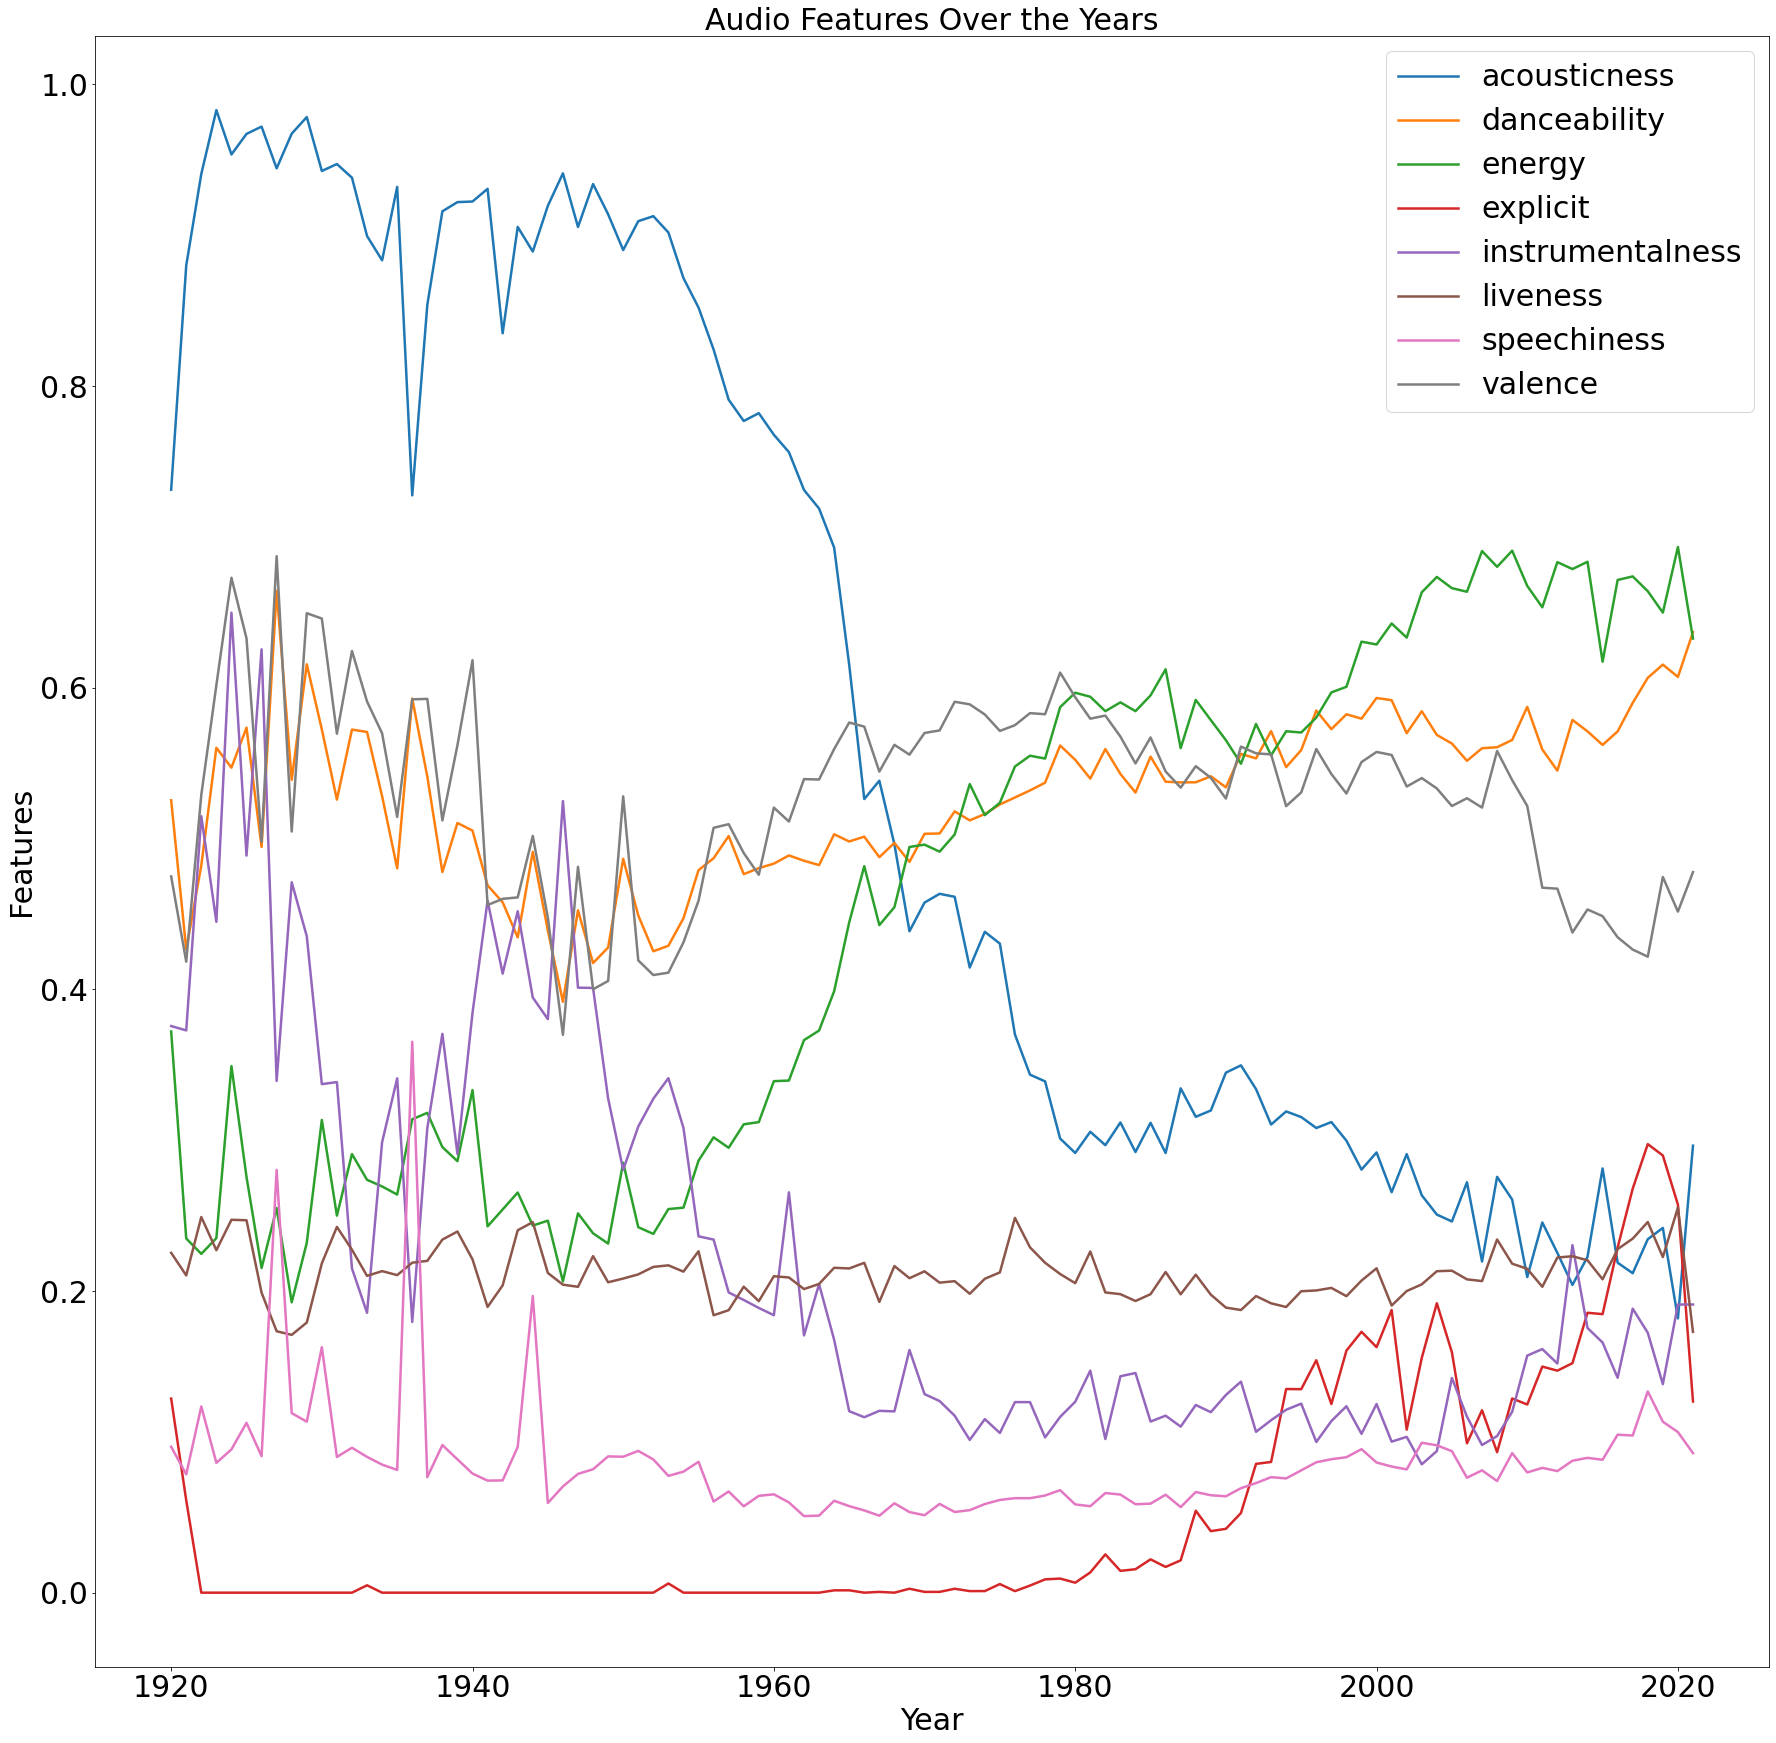

In [48]:
columns = ["acousticness", "danceability", "energy", "explicit", "instrumentalness", "liveness", "speechiness", "valence"]
plt.figure(figsize=(30,30))
for cols in columns:
    audio = df.groupby("year")[cols].mean()
    sns.lineplot(x=audio.index, y=audio, label=cols, linewidth=2.5)
plt.title("Audio Features Over the Years", fontsize=30)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Features", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(prop={'size': 30});

    

In [49]:
df.groupby("year")['energy'].mean()

year
1920    0.372092
1921    0.234842
1922    0.224642
1923    0.235075
1924    0.349169
1925    0.275670
1926    0.215250
1927    0.255002
1928    0.192527
1929    0.231961
1930    0.313430
1931    0.250000
1932    0.290812
1933    0.273753
1934    0.269345
1935    0.263968
1936    0.313887
1937    0.318152
1938    0.295422
1939    0.286114
1940    0.333251
1941    0.242864
1942    0.254099
1943    0.265332
1944    0.243393
1945    0.246674
1946    0.206337
1947    0.251495
1948    0.238284
1949    0.231467
1950    0.285095
1951    0.242334
1952    0.237891
1953    0.254347
1954    0.255291
1955    0.286445
1956    0.301914
1957    0.294984
1958    0.310542
1959    0.312008
1960    0.339151
1961    0.339569
1962    0.366368
1963    0.372715
1964    0.398789
1965    0.444434
1966    0.481701
1967    0.442607
1968    0.454508
1969    0.494431
1970    0.495984
1971    0.491318
1972    0.502729
1973    0.536139
1974    0.515533
1975    0.523756
1976    0.547782
1977    0.554949
1978    0

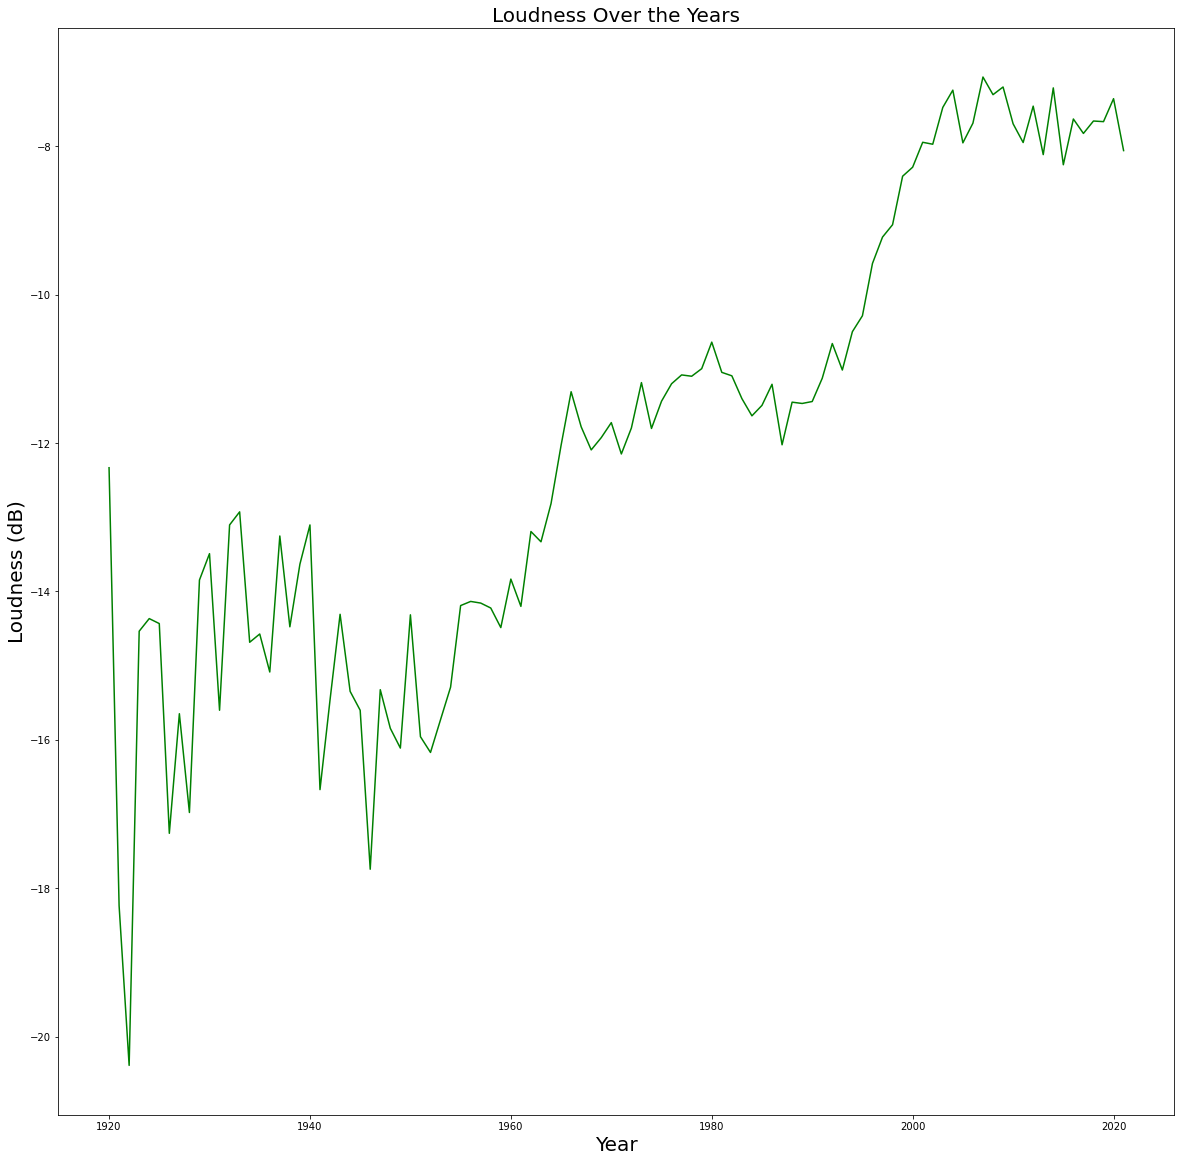

In [50]:
loudness = df.groupby("year")["loudness"].mean()
plt.figure(figsize=(20,20))
sns.lineplot(x=loudness.index, y=loudness, color='g')
plt.title("Loudness Over the Years",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Loudness (dB)",fontsize=20);

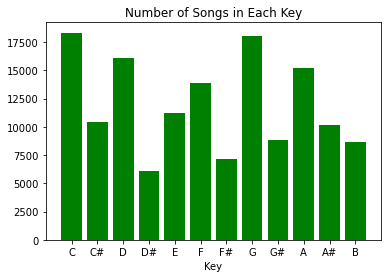

In [51]:
key = df["key"].value_counts()
plt.bar(x=key.index, height=key, color='g')
plt.title("Number of Songs in Each Key")
plt.xlabel("Key")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
labels = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B')
plt.xticks(positions, labels);

In [52]:
mode = df["mode"].value_counts()
mode

1    102384
0     41782
Name: mode, dtype: int64

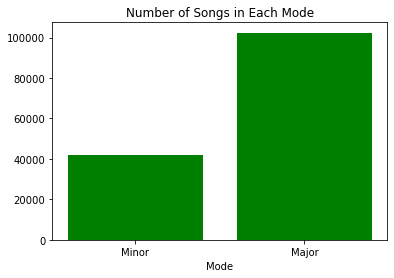

In [53]:
plt.bar(x=mode.index, height=mode, color='g')
plt.title("Number of Songs in Each Mode")
plt.xlabel("Mode")
positions = (0, 1)
labels = ('Minor', 'Major')
plt.xticks(positions, labels);

### Number of Songs Released Each Year

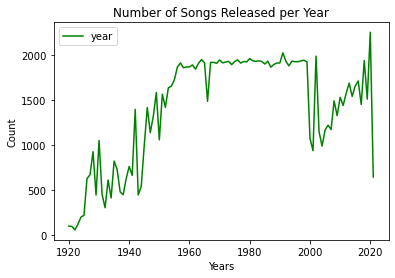

In [54]:
year = pd.DataFrame(df["year"].value_counts())
year = year.sort_index()
year.plot(kind="line", color='g')
plt.title("Number of Songs Released per Year")
plt.xlabel("Years")
plt.ylabel("Count");

In [55]:
df["year"].value_counts()

2020    2254
1991    2026
2002    1989
1980    1962
1964    1950
1976    1947
1970    1946
1998    1944
2018    1940
1983    1937
1981    1937
1997    1935
1986    1933
1994    1933
1992    1932
1973    1930
1982    1930
1978    1929
1984    1929
1975    1929
1995    1927
1996    1927
1979    1925
1999    1925
1972    1923
1968    1920
1967    1918
1965    1915
1971    1914
1990    1913
1957    1913
1989    1912
1977    1912
1963    1909
1969    1909
1985    1901
1988    1896
1974    1895
1961    1891
1993    1881
1960    1869
1956    1868
1959    1868
1987    1866
1958    1860
1962    1844
1955    1727
2016    1713
2013    1689
2015    1657
1954    1655
1953    1637
1949    1585
2012    1576
1951    1566
2014    1541
2010    1531
2019    1511
2008    1492
1966    1487
2017    1452
2011    1441
1952    1420
1946    1418
1942    1397
2009    1328
1948    1321
2006    1222
2007    1174
2005    1167
2003    1150
1947    1139
2000    1075
1950    1059
1930    1052
1945    1000
2004     990

### Number of Songs Released Each Decade

In [56]:
song_count_decade = df['song_decade'].value_counts()
song_count_decade

1990s    19343
1970s    19250
1980s    19203
1960s    18612
1950s    16573
2010s    16051
2000s    12526
1940s    10279
1930s     5951
1920s     3477
2020s     2901
Name: song_decade, dtype: int64

In [57]:
song_count_decade = song_count_decade.reset_index()
song_count_decade.columns = ['decade', 'song_count']
song_count_decade = song_count_decade.sort_values(by= 'decade')
song_count_decade

,decade,song_count
9,1920s,3477
8,1930s,5951
7,1940s,10279
4,1950s,16573
3,1960s,18612
1,1970s,19250
2,1980s,19203
0,1990s,19343
6,2000s,12526
5,2010s,16051


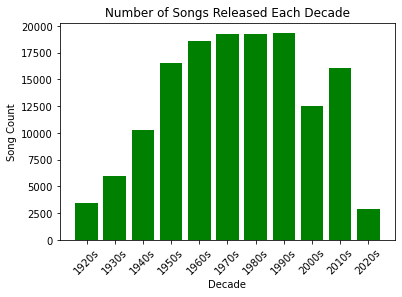

In [58]:
plt.bar(x=song_count_decade['decade'], height=song_count_decade['song_count'], color='g')
plt.title('Number of Songs Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Song Count')
plt.xticks(rotation=45);

### Number of Songs Released by Genre

In [59]:
# Makes it into an actual list instead of a string list
df['genres'] = df['genres'].apply(lambda x: x[1:-1].split(', '))

for i in df.index:
# filters out empty values in each list
    df['genres'].loc[i] = list(filter(None, df['genres'][i]))

/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [60]:
song_count_genres = df['genres'].explode().value_counts().sort_values(ascending=False).head(25)
song_count_genres

"'rock'"                  22738
"'classic rock'"          16746
"'adult standards'"       16173
"'mellow gold'"           13758
"'album rock'"            12178
"'folk rock'"             11427
"'soft rock'"             11359
"'classical'"             10599
"'country rock'"          10092
"'vocal jazz'"             8974
"'lounge'"                 8349
"'soul'"                   8246
"'art rock'"               7666
"'hard rock'"              7639
"'brill building pop'"     7097
"'jazz'"                   6562
"'folk'"                   6542
"'bebop'"                  6481
"'cool jazz'"              6456
"'psychedelic rock'"       6077
"'roots rock'"             5857
"'blues rock'"             5503
"'dance pop'"              5478
"'dance rock'"             5370
"'pop'"                    5339
Name: genres, dtype: int64

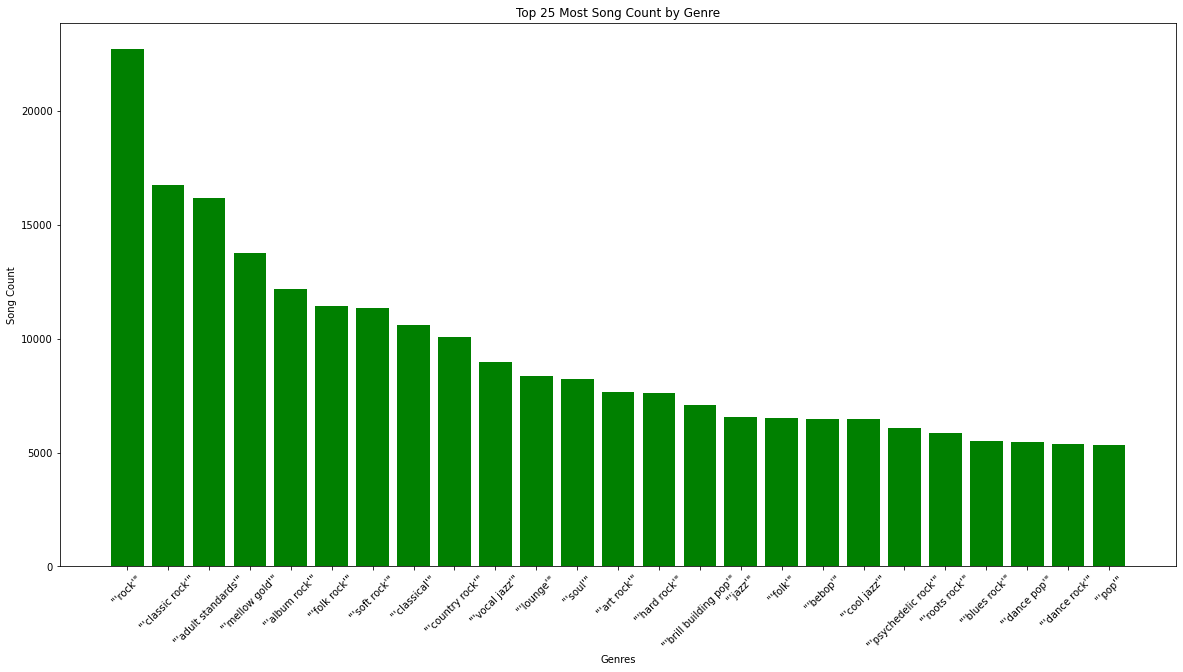

In [61]:
plt.figure(figsize=(20,10))
plt.bar(x=song_count_genres.index, height=song_count_genres,data = song_count_genres,color='g')
plt.title('Top 25 Most Song Count by Genre')
plt.xlabel('Genres')
plt.ylabel('Song Count')
plt.xticks(rotation=45);